In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

## load data 

In [4]:
gold_price = pd.read_csv('gld_price_data.csv')

In [5]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_price.shape

(2290, 6)

In [7]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# checking for the missing values
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data 
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation =gold_price.corr()

<AxesSubplot:>

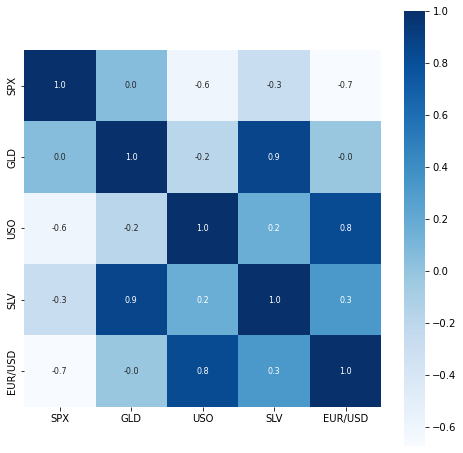

In [9]:
# construction of heat map to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt = '.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [10]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [12]:
gold_price

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [13]:
# splitting the features and target
x = gold_price.drop(['Date','GLD'],axis = 1)
y = gold_price['GLD']


In [14]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# splitting the data 

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [9]:
# model training 

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
# training the model 
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
# model evaluation 
y_pred = regressor.predict(x_test)

In [13]:
print(y_pred)

[168.65329928  82.16889978 115.88069982 127.79190085 120.70200101
 154.77939772 150.00569823 126.16670042 117.43619875 126.32820001
 116.62110114 171.24750073 141.61569876 167.73679852 115.12530024
 117.64240004 138.8581029  170.32900063 158.8050028  159.89870015
 155.10090002 125.28950024 176.43919915 157.37240329 125.25940039
  93.87319974  77.95400029 120.6418997  119.1445998  167.2244991
  88.34790067 125.36380049  91.06480074 117.6412003  121.06639883
 136.31050132 115.42500111 115.14060034 146.89869994 107.18920088
 104.14260242  87.03809786 126.50510048 118.02609994 151.5677983
 119.67380017 108.31320017 108.11709808  93.07360011 127.33839689
  75.01060011 113.68269927 121.34990001 111.27569936 118.88059876
 120.48179975 159.48630013 167.72630216 146.7581967   85.86029883
  94.3676005   86.83089886  90.58520005 119.07050082 126.46870053
 127.55149987 169.54449945 122.26619918 117.39829901  98.61140074
 167.54950082 142.96969883 131.70100242 121.1155021  120.79129946
 119.5555006

In [19]:
# R squared error 
error_score = metrics.r2_score(y_test,y_pred)

In [20]:
print('R_squared error: ',error_score)

R_squared error:  0.9891563319277102


In [21]:
y_test = list(y_test)

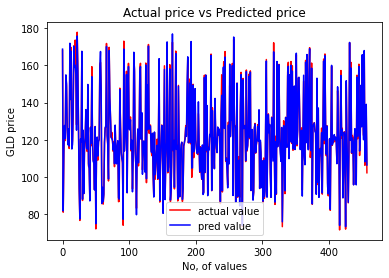

In [22]:
plt.plot (y_test, color='red', label='actual value')
plt.plot (y_pred,color = 'blue', label ='pred value')
plt.title('Actual price vs Predicted price')
plt.xlabel ('No, of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [20]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [25]:
gold_price.SPX[0]

1447.160034

In [26]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
s = np.array(x.iloc[0,:]).reshape(1,-1)

In [28]:
print(s)

[[1447.160034   78.470001   15.18        1.471692]]


In [29]:
yy_pred = regressor.predict(s)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
print(yy_pred)

[84.95840037]


In [31]:
r=np.array([4179,66.57,23.8,1.08]).reshape(1,-1)

In [32]:
print(r)

[[4.179e+03 6.657e+01 2.380e+01 1.080e+00]]


In [33]:
yyy_pred = regressor.predict(r)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
print(yyy_pred)

[140.73959807]


In [1]:
## PICKLING THE MODEL 

In [35]:
import pickle 

In [37]:
pickle.dump(regressor,open('gldmodel.pkl','wb'))

In [38]:
pickled_model =pickle.load(open('gldmodel.pkl','rb'))

In [40]:
pickled_model.predict(s)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.95840037])